In [5]:
import zipfile
import os

# Step 1: Specify the paths
zip_file_path = r"C:\Users\ASUS\Desktop\archive (2).zip"  # Replace with the actual path
extract_dir = r"C:\Users\ASUS\Desktop\dataset"  # Temporary extraction directory

# Step 2: Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
print(f"Files extracted to: {extract_dir}")

# Step 3: Define the paths for train, valid, and test directories
train_dir = os.path.join(extract_dir, "New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train")
valid_dir = os.path.join(extract_dir, "New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid")
test_dir = os.path.join(extract_dir, "test")

# Step 4: Print the paths to verify
print(f"Train Directory: {train_dir}")
print(f"Validation Directory: {valid_dir}")
print(f"Test Directory: {test_dir}")


Files extracted to: C:\Users\ASUS\Desktop\dataset
Train Directory: C:\Users\ASUS\Desktop\dataset\New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train
Validation Directory: C:\Users\ASUS\Desktop\dataset\New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid
Test Directory: C:\Users\ASUS\Desktop\dataset\test


In [6]:
# Validate the existence of the directories
print(f"Train Directory Exists: {os.path.exists(train_dir)}")
print(f"Validation Directory Exists: {os.path.exists(valid_dir)}")
print(f"Test Directory Exists: {os.path.exists(test_dir)}")

Train Directory Exists: True
Validation Directory Exists: True
Test Directory Exists: True


In [10]:
!dir "C:\Users\ASUS\Desktop\dataset" 

 Volume in drive C has no label.
 Volume Serial Number is 1C21-C234

 Directory of C:\Users\ASUS\Desktop\dataset

01/06/2025  09:30 PM    <DIR>          .
01/06/2025  09:31 PM    <DIR>          ..
01/06/2025  09:27 PM    <DIR>          New Plant Diseases Dataset(Augmented)
01/06/2025  09:30 PM    <DIR>          test
               0 File(s)              0 bytes
               4 Dir(s)  136,631,218,176 bytes free


In [11]:
!dir "C:\Users\ASUS\Desktop\dataset\New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"

 Volume in drive C has no label.
 Volume Serial Number is 1C21-C234

 Directory of C:\Users\ASUS\Desktop\dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train

01/06/2025  09:30 PM    <DIR>          .
01/06/2025  09:30 PM    <DIR>          ..
01/06/2025  09:30 PM    <DIR>          Apple___Apple_scab
01/06/2025  09:30 PM    <DIR>          Apple___Black_rot
01/06/2025  09:30 PM    <DIR>          Apple___Cedar_apple_rust
01/06/2025  09:31 PM    <DIR>          Apple___healthy
01/06/2025  09:31 PM    <DIR>          Blueberry___healthy
01/06/2025  09:29 PM    <DIR>          Cherry_(including_sour)___healthy
01/06/2025  09:29 PM    <DIR>          Cherry_(including_sour)___Powdery_mildew
01/06/2025  09:29 PM    <DIR>          Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
01/06/2025  09:29 PM    <DIR>          Corn_(maize)___Common_rust_
01/06/2025  09:29 PM    <DIR>          Corn_(maize)___healthy
01/06/2025  09:29 PM    <DIR>          Corn_(maize)___No

In [12]:
!dir "C:\Users\ASUS\Desktop\dataset\New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

 Volume in drive C has no label.
 Volume Serial Number is 1C21-C234

 Directory of C:\Users\ASUS\Desktop\dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid

01/06/2025  09:30 PM    <DIR>          .
01/06/2025  09:30 PM    <DIR>          ..
01/06/2025  09:30 PM    <DIR>          Apple___Apple_scab
01/06/2025  09:30 PM    <DIR>          Apple___Black_rot
01/06/2025  09:30 PM    <DIR>          Apple___Cedar_apple_rust
01/06/2025  09:30 PM    <DIR>          Apple___healthy
01/06/2025  09:30 PM    <DIR>          Blueberry___healthy
01/06/2025  09:30 PM    <DIR>          Cherry_(including_sour)___healthy
01/06/2025  09:30 PM    <DIR>          Cherry_(including_sour)___Powdery_mildew
01/06/2025  09:30 PM    <DIR>          Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
01/06/2025  09:30 PM    <DIR>          Corn_(maize)___Common_rust_
01/06/2025  09:30 PM    <DIR>          Corn_(maize)___healthy
01/06/2025  09:30 PM    <DIR>          Corn_(maize)___No

## Performing EDA(Exploratory data analysis) on the dataset

Importing important Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Inspecting the dataset structure

In [16]:
# Step 1: Specify the base extraction directory
extract_dir = r"C:\Users\ASUS\Desktop\dataset"  # Directory where files were extracted

# Step 2: Define the base directory for train and valid
base_dir = os.path.join(extract_dir, "New Plant Diseases Dataset(Augmented)", "New Plant Diseases Dataset(Augmented)")
train_dir = os.path.join(base_dir, "train")
valid_dir = os.path.join(base_dir, "valid")

# Step 3: List class directories in train and valid
try:
    train_classes = sorted(os.listdir(train_dir))  # Sorted for consistency
    valid_classes = sorted(os.listdir(valid_dir))  # Sorted for consistency
except FileNotFoundError as e:
    print(f"Error: {e}")
    train_classes = []
    valid_classes = []

# Step 4: Create DataFrames
train_df = pd.DataFrame({"Training Classes": train_classes})
valid_df = pd.DataFrame({"Validation Classes": valid_classes})

# Step 5: Display the sorted DataFrames
print("Training Classes:\n", train_df)
print("\nValidation Classes:\n", valid_df)


Training Classes:
                                      Training Classes
0                                  Apple___Apple_scab
1                                   Apple___Black_rot
2                            Apple___Cedar_apple_rust
3                                     Apple___healthy
4                                 Blueberry___healthy
5            Cherry_(including_sour)___Powdery_mildew
6                   Cherry_(including_sour)___healthy
7   Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...
8                         Corn_(maize)___Common_rust_
9                 Corn_(maize)___Northern_Leaf_Blight
10                             Corn_(maize)___healthy
11                                  Grape___Black_rot
12                       Grape___Esca_(Black_Measles)
13         Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
14                                    Grape___healthy
15           Orange___Haunglongbing_(Citrus_greening)
16                             Peach___Bacterial_spot
17       

In [17]:
def count_images_per_class(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):  # Only count directories
            class_counts[class_name] = len(os.listdir(class_path))  # Count files in each class directory
    return class_counts

train_class_counts = count_images_per_class(train_dir)
valid_class_counts = count_images_per_class(valid_dir)

train_df = pd.DataFrame(list(train_class_counts.items()), columns=["Class Name", "Image Count"])
valid_df = pd.DataFrame(list(valid_class_counts.items()), columns=["Class Name", "Image Count"])

train_df = train_df.sort_values(by="Class Name").reset_index(drop=True)
valid_df = valid_df.sort_values(by="Class Name").reset_index(drop=True)

print("Training Set Class Counts:")
print(train_df)

print("\nValidation Set Class Counts:")
print(valid_df)


Training Set Class Counts:
                                           Class Name  Image Count
0                                  Apple___Apple_scab         2016
1                                   Apple___Black_rot         1987
2                            Apple___Cedar_apple_rust         1760
3                                     Apple___healthy         2008
4                                 Blueberry___healthy         1816
5            Cherry_(including_sour)___Powdery_mildew         1683
6                   Cherry_(including_sour)___healthy         1826
7   Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...         1642
8                         Corn_(maize)___Common_rust_         1907
9                 Corn_(maize)___Northern_Leaf_Blight         1908
10                             Corn_(maize)___healthy         1859
11                                  Grape___Black_rot         1888
12                       Grape___Esca_(Black_Measles)         1920
13         Grape___Leaf_blight_(Isa

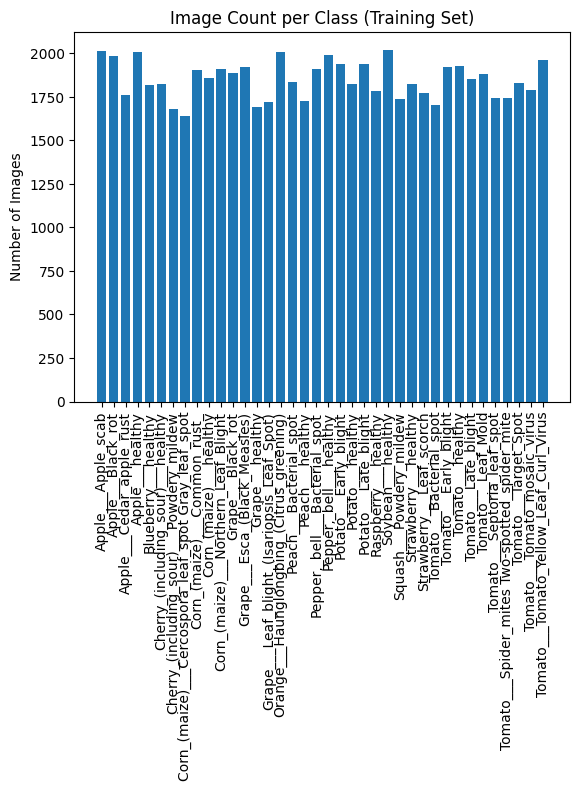

In [18]:
# Bar plot for training data
plt.bar(train_class_counts.keys(), train_class_counts.values())
plt.title("Image Count per Class (Training Set)")
plt.xticks(rotation=90)
plt.ylabel("Number of Images")
plt.show()

Displaying a few sample images from each class

In [96]:
from PIL import Image

def analyze_image_dimensions(directory):
    dimensions = []
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            with Image.open(img_path) as img:
                dimensions.append(img.size)
    return dimensions

train_image_dims = analyze_image_dimensions(train_dir)

# Convert to NumPy array and compute statistics
train_dims_array = np.array(train_image_dims)
print("Image Dimension Statistics (Training Set):")
print(f"Mean Width: {np.mean(train_dims_array[:, 0])}, Mean Height: {np.mean(train_dims_array[:, 1])}")
print(f"Min Width: {np.min(train_dims_array[:, 0])}, Min Height: {np.min(train_dims_array[:, 1])}")
print(f"Max Width: {np.max(train_dims_array[:, 0])}, Max Height: {np.max(train_dims_array[:, 1])}")


Image Dimension Statistics (Training Set):
Mean Width: 256.0, Mean Height: 256.0
Min Width: 256, Min Height: 256
Max Width: 256, Max Height: 256


Since the min. width, min height, max width and max height are same, so the dimensions of the dataset are consistent.

# Data Preprocessing

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training and validationdataset preprocessing

Found 63282 images belonging to 38 classes.
Found 7013 images belonging to 38 classes.


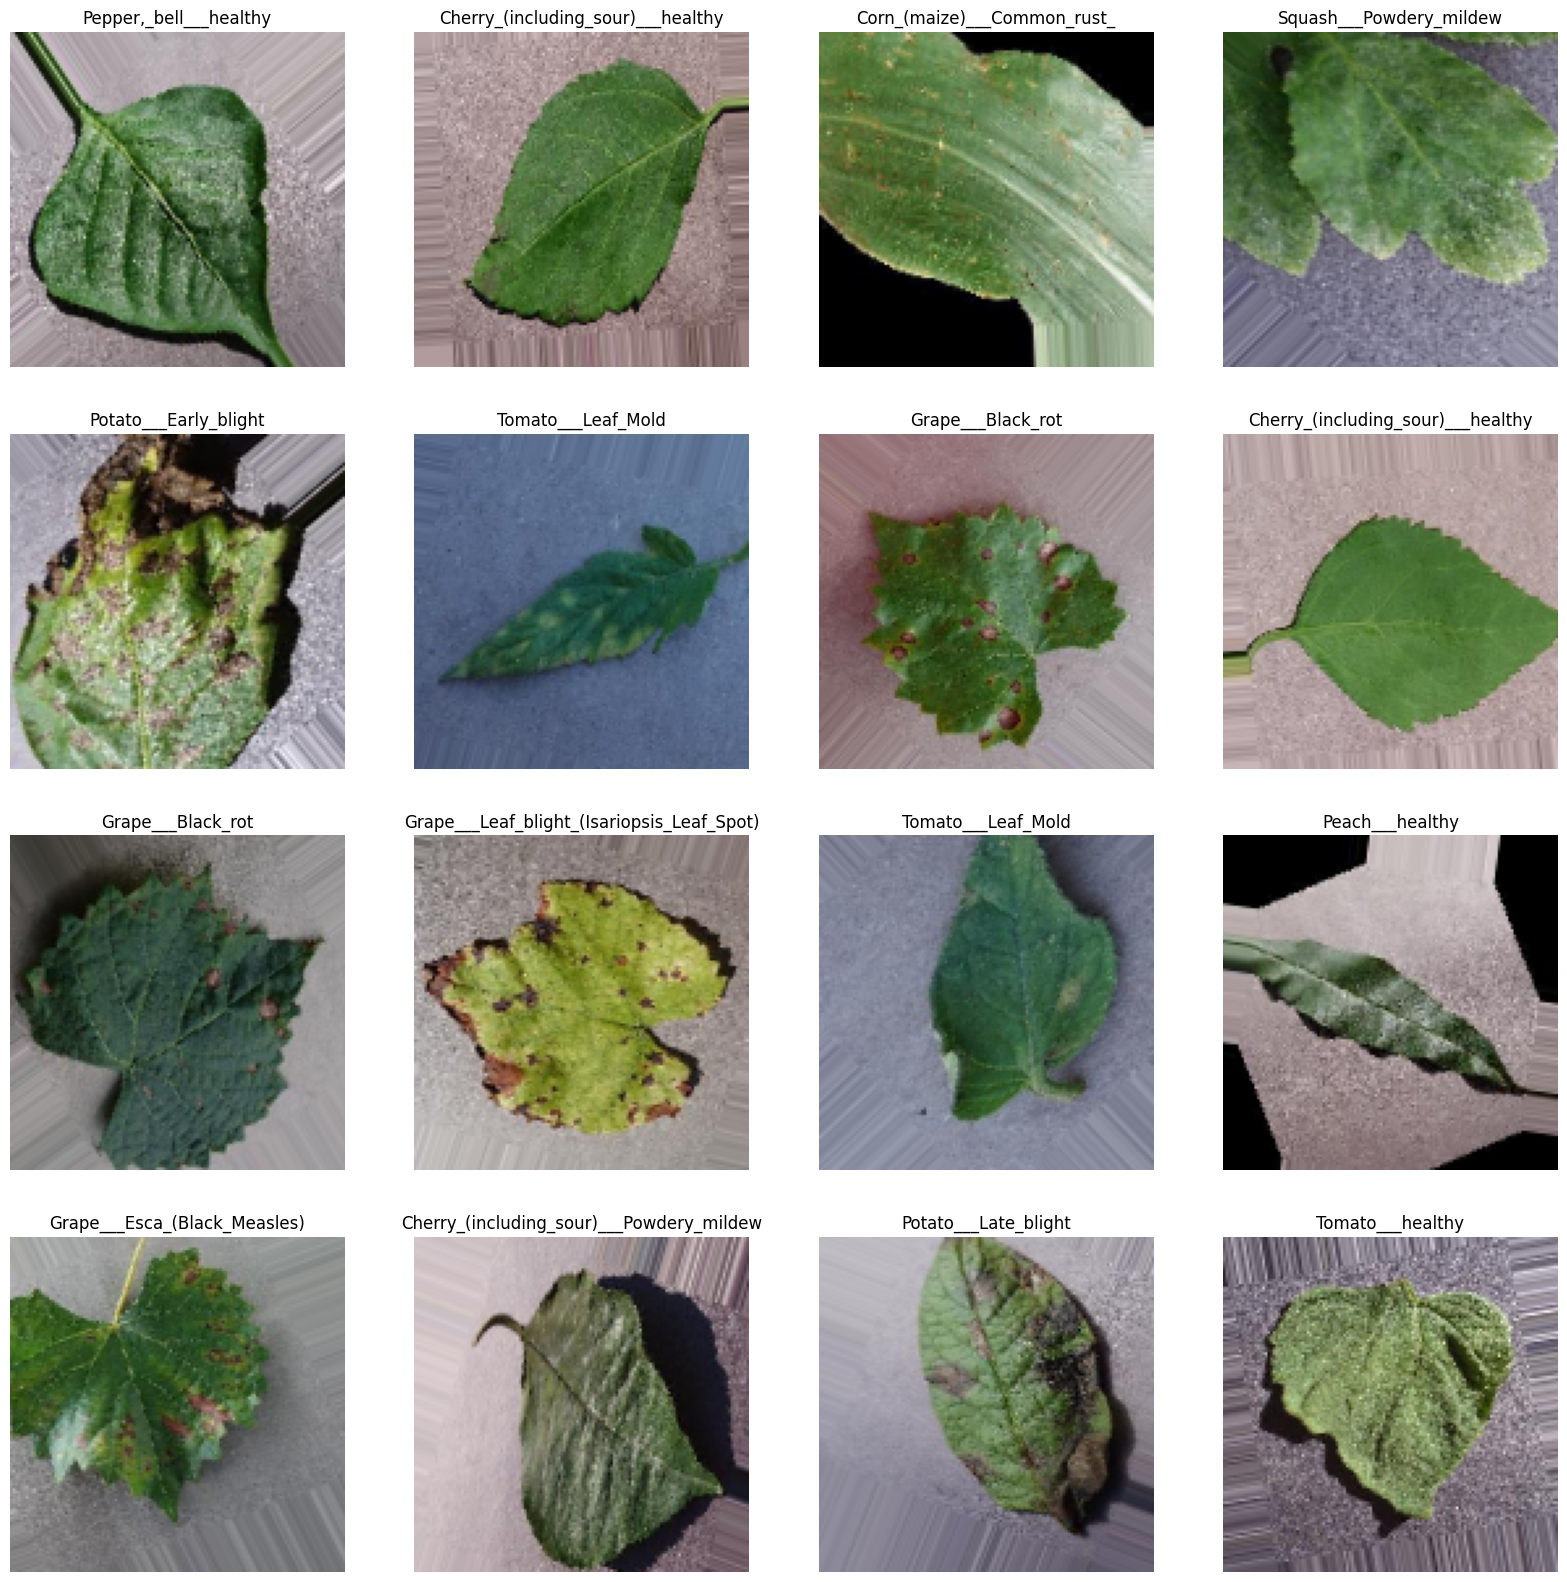

Found 17572 images belonging to 38 classes.
Class Indices: {'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Toma

In [25]:
# Image augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1/255.0,           # Normalize pixel values to [0, 1]
    rotation_range=90,         # Random rotation up to 90 degrees
    width_shift_range=0.1,     # Horizontal shift by 10% of image width
    height_shift_range=0.1,    # Vertical shift by 10% of image height
    shear_range=0.2,           # Shear transformation
    zoom_range=0.2,            # Random zoom
    horizontal_flip=True,      # Randomly flip images horizontally
    vertical_flip=True,        # Randomly flip images vertically
    validation_split=0.1       # Reserve 10% of data for validation
)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),    # Resize images to 128x128
    batch_size=32,
    class_mode="categorical",  # Use categorical labels
    subset="training",         # Use the training subset
    shuffle=True,              # Shuffle images
    color_mode="rgb"           # Color mode
)

# Validation data generator
valid_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    subset="validation",       # Use the validation subset
    shuffle=False,
    color_mode="rgb"
)

# Display some augmented images from the training set
classes = list(train_generator.class_indices.keys())
plt.figure(figsize=(20, 20))
for X_batch, y_batch in train_generator:
    # Create a grid of 4x4 images
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.argmax(y_batch[i])])  # Show class name
        plt.axis('off')
    plt.show()
    break

# Test data generator (no augmentation, just rescaling)
test_datagen = ImageDataGenerator(
    rescale=1/255.0  # Normalize pixel values
)

test_generator = test_datagen.flow_from_directory(
    valid_dir,  # Test data comes from the validation directory
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    shuffle=False,
    color_mode="rgb"
)

# Display class indices
print("Class Indices:", train_generator.class_indices)


In [26]:
# Loop through the train_generator to fetch a batch of images and labels
for x, y in train_generator:
    print("Image batch shape:", x.shape)  # x is the batch of images
    print("Label batch shape:", y.shape)  # y is the batch of labels
    break  # Only run for one batch to check the shapes


Image batch shape: (32, 128, 128, 3)
Label batch shape: (32, 38)


Through this it represents that batch size is 32 i.e. at a time 32 images will be processed, of size 128*128 of rgb type

# Building the Model

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

# Define the model
model = Sequential()


In [58]:
# Add Convolutional and Pooling Layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu'))
#Here I have used 32 filters and kernal size as 3*3, and also have applied padding
#for preserving the edge information and maintaing the dimensions

model.add(MaxPool2D(pool_size=(2, 2)))
#here pool size/pooling window is 2*2 and since i have not defined strides
#i.e. how much the window moves during pooling, it is by default same as pooling size

In [59]:
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
#Here I have used 64 filters and kernal size as 3*3, and also have applied padding
#for preserving the edge information and maintaing the dimensions

model.add(MaxPool2D(pool_size=(2, 2)))
#here pool size/pooling window is 2*2 and since i have not defined strides
#i.e. how much the window moves during pooling, it is by default same as pooling size

In [60]:
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(128, 128, 3), padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu'))
#Here I have used 128 filters and kernal size as 3*3, and also have applied padding
#for preserving the edge information and maintaing the dimensions

model.add(MaxPool2D(pool_size=(2, 2)))
#here pool size/pooling window is 2*2 and since i have not defined strides
#i.e. how much the window moves during pooling, it is by default same as pooling size

In [61]:
model.add(Conv2D(256, (3, 3), activation='relu', input_shape=(128, 128,3), padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu'))
#Here I have used 256 filters and kernal size as 3*3, and also have applied padding
#for preserving the edge information and maintaing the dimensions

model.add(MaxPool2D(pool_size=(2, 2)))
#here pool size/pooling window is 2*2 and since i have not defined strides
#i.e. how much the window moves during pooling, it is by default same as pooling size

In [62]:
model.add(Conv2D(512, (3, 3), activation='relu', input_shape=(128, 128,3), padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu'))
#Here I have used 256 filters and kernal size as 3*3, and also have applied padding
#for preserving the edge information and maintaing the dimensions

model.add(MaxPool2D(pool_size=(2, 2)))
#here pool size/pooling window is 2*2 and since i have not defined strides
#i.e. how much the window moves during pooling, it is by default same as pooling size

In [63]:
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=2048, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=38, activation='softmax')) #for output layer

# Model Compiling

In [64]:
from tensorflow.keras.optimizers import Adam

# Define Adam optimizer with a reduced learning rate
optimizer = Adam(learning_rate=0.0001)

# Compile the model with the updated optimizer
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [65]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2048)                │       4,196,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 38)                  │          77,862 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,986,438 (34.28 MB)

 Trainable params: 8,986,438 (34.28 MB)

 Non-trainable params: 0 (0.00 B)

# Training the model

In [66]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True )

In [67]:
# Train the model
history = model.fit(train_generator, validation_data=valid_generator, epochs=12, callbacks=[early_stopping], verbose=1)

Epoch 1/12
1978/1978 ━━━━━━━━━━━━━━━━━━━━ 904s 456ms/step - accuracy: 0.1426 - loss: 3.0636 - val_accuracy: 0.5245 - val_loss: 1.5429
Epoch 2/12
1978/1978 ━━━━━━━━━━━━━━━━━━━━ 867s 438ms/step - accuracy: 0.5646 - loss: 1.3868 - val_accuracy: 0.7403 - val_loss: 0.8062
Epoch 3/12
1978/1978 ━━━━━━━━━━━━━━━━━━━━ 866s 438ms/step - accuracy: 0.7432 - loss: 0.7883 - val_accuracy: 0.7931 - val_loss: 0.6247
Epoch 4/12
1978/1978 ━━━━━━━━━━━━━━━━━━━━ 905s 458ms/step - accuracy: 0.8093 - loss: 0.5763 - val_accuracy: 0.8547 - val_loss: 0.4485
Epoch 5/12
1978/1978 ━━━━━━━━━━━━━━━━━━━━ 909s 459ms/step - accuracy: 0.8525 - loss: 0.4382 - val_accuracy: 0.8471 - val_loss: 0.4440
Epoch 6/12
1978/1978 ━━━━━━━━━━━━━━━━━━━━ 922s 466ms/step - accuracy: 0.8818 - loss: 0.3550 - val_accuracy: 0.8985 - val_loss: 0.3079
Epoch 7/12
1978/1978 ━━━━━━━━━━━━━━━━━━━━ 925s 467ms/step - accuracy: 0.9036 - loss: 0.2898 - val_accuracy: 0.9093 - val_loss: 0.2706
Epoch 8/12
1978/1978 ━━━━━━━━━━━━━━━━━━━━ 877s 443ms/step - ac

In [78]:
train_loss, train_acc = model.evaluate(train_generator)
print("Training Accuracy:", train_acc)
print("Training Loss:", train_loss)

1978/1978 ━━━━━━━━━━━━━━━━━━━━ 435s 220ms/step - accuracy: 0.9709 - loss: 0.0868
Training Accuracy: 0.9696754217147827
Training Loss: 0.08893653005361557


In [120]:
train_loss, train_acc = model.evaluate(valid_generator)
print("Training Accuracy:", train_acc)
print("Training Loss:", train_loss)

220/220 ━━━━━━━━━━━━━━━━━━━━ 66s 302ms/step - accuracy: 0.9633 - loss: 0.1054 
Training Accuracy: 0.9566519260406494
Training Loss: 0.12512721121311188


In [121]:
model.save('disease_model.keras')

In [81]:
history.history

{'accuracy': [0.2646092176437378,
  0.6202869415283203,
  0.7624759078025818,
  0.8219714760780334,
  0.8609083294868469,
  0.8873929381370544,
  0.9073828458786011,
  0.9185866713523865,
  0.930106520652771,
  0.9371384978294373,
  0.945071280002594,
  0.9503650069236755],
 'loss': [2.541273832321167,
  1.1965234279632568,
  0.7318928241729736,
  0.5371896624565125,
  0.4195985794067383,
  0.3378467559814453,
  0.28021886944770813,
  0.24069006741046906,
  0.20774033665657043,
  0.18415610492229462,
  0.16272562742233276,
  0.15031248331069946],
 'val_accuracy': [0.5244545936584473,
  0.7403393983840942,
  0.793098509311676,
  0.8546984195709229,
  0.8471410274505615,
  0.8984742760658264,
  0.9093112945556641,
  0.9364038109779358,
  0.9141594171524048,
  0.9279908537864685,
  0.9478111863136292,
  0.9565093517303467],
 'val_loss': [1.5428749322891235,
  0.8061540126800537,
  0.6246881484985352,
  0.44852811098098755,
  0.44404757022857666,
  0.3079012930393219,
  0.2706089913845062,

In [110]:
# recording history in json
import json
with open("history.json", "w") as f:
    json.dump(history.history, f)

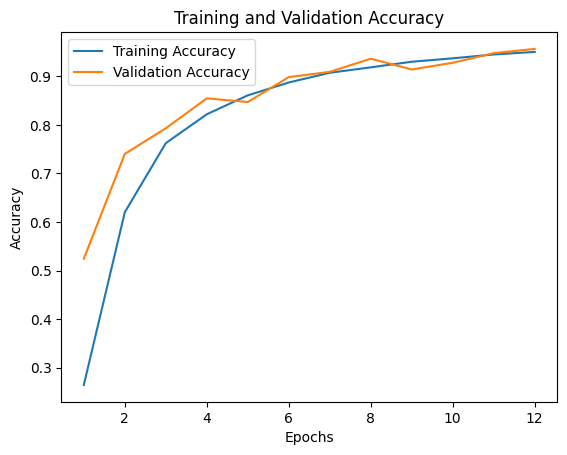

In [111]:
epochs = [i for i in range(1,13)]
plt.plot(epochs, history.history["accuracy"], label="Training Accuracy")
plt.plot(epochs, history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

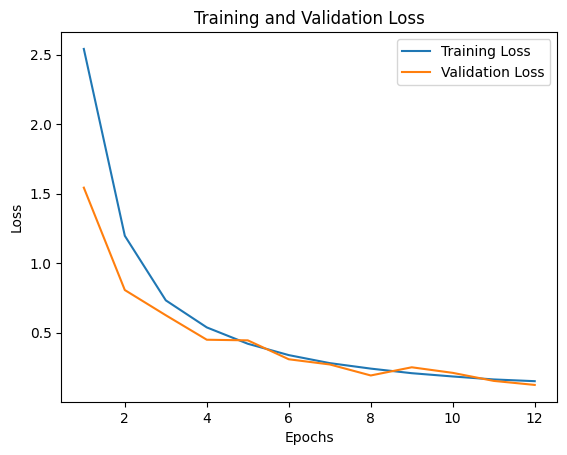

In [112]:
epochs = [i for i in range(1,13)]
plt.plot(epochs, history.history["loss"], label="Training Loss")
plt.plot(epochs, history.history["val_loss"], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [113]:
class_names = list(valid_generator.class_indices.keys())
print(class_names)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [114]:
model.save('plant_disease_model.keras')

In [115]:
from sklearn.metrics import confusion_matrix, classification_report

# Get true labels and predictions
y_true = valid_generator.classes  # True labels
y_pred = model.predict(valid_generator)  # Model predictions (probabilities)

# Convert predictions to class indices
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
class_names = list(valid_generator.class_indices.keys())  # Class names
cm = confusion_matrix(y_true, y_pred_classes)


220/220 ━━━━━━━━━━━━━━━━━━━━ 67s 303ms/step


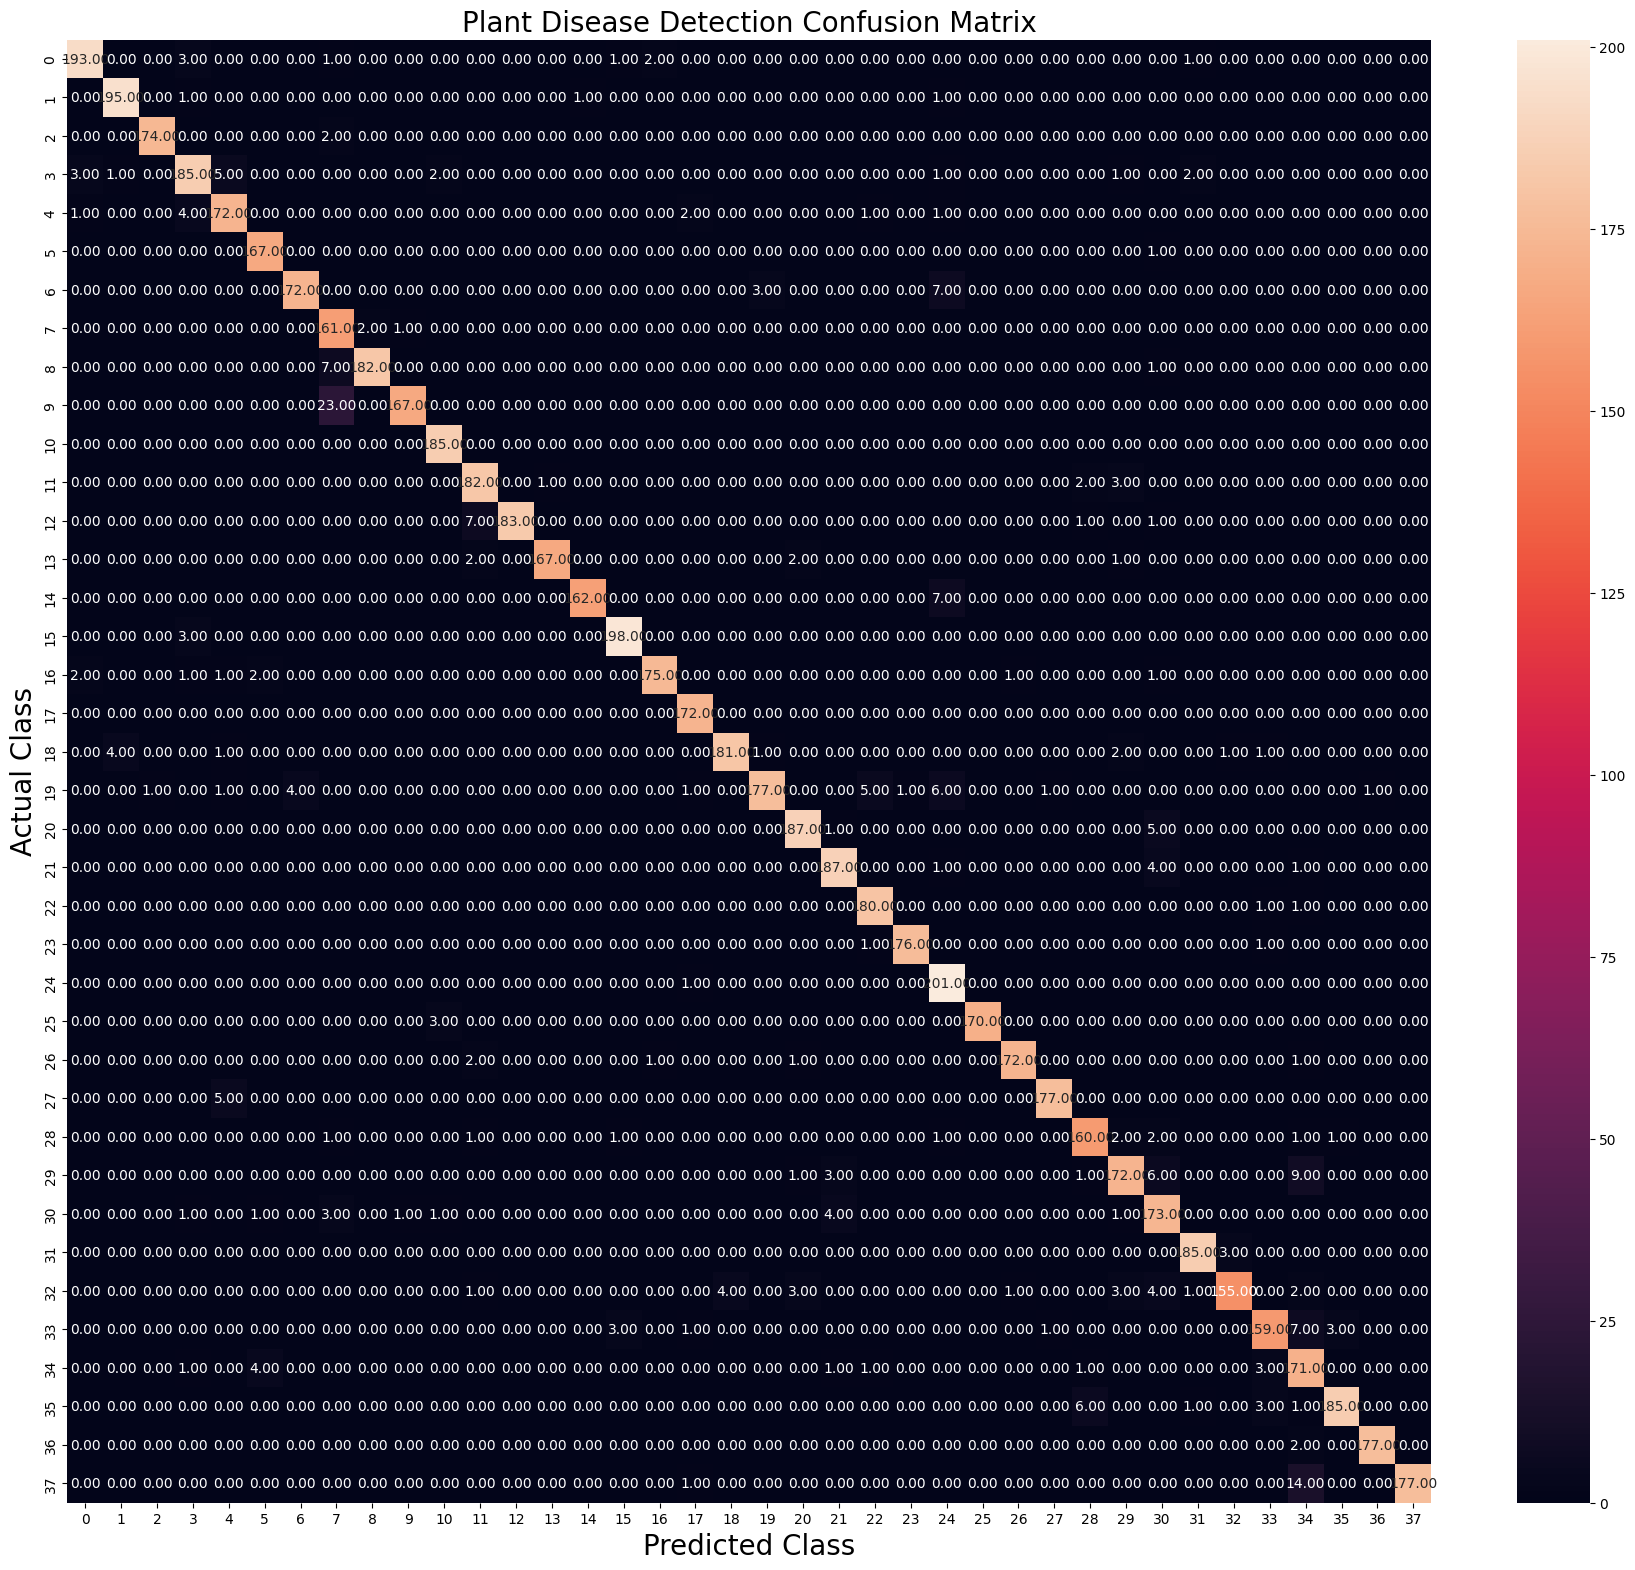

In [116]:
# Plot a beautified confusion matrix
plt.figure(figsize=(22, 19))
sns.heatmap(cm, annot=True,fmt='.2f',annot_kws={'size':10})
plt.xlabel("Predicted Class", fontsize=20)
plt.ylabel("Actual Class", fontsize=20)
plt.title("Plant Disease Detection Confusion Matrix", fontsize=20)
plt.show()

In [117]:
#Print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))


Classification Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.96      0.96       201
                                 Apple___Black_rot       0.97      0.98      0.98       198
                          Apple___Cedar_apple_rust       0.99      0.99      0.99       176
                                   Apple___healthy       0.93      0.93      0.93       200
                               Blueberry___healthy       0.93      0.95      0.94       181
          Cherry_(including_sour)___Powdery_mildew       0.96      0.99      0.98       168
                 Cherry_(including_sour)___healthy       0.98      0.95      0.96       182
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.81      0.98      0.89       164
                       Corn_(maize)___Common_rust_       0.99      0.96      0.97       190
               Corn_(maize)___Northern_Leaf_Blight     

In [119]:
model.save('plant_disease_model.keras')